Mounting and Export

In [1]:
# load folder gdrive /content/drive/MyDrive/HSLU/CV/Project and go to this

import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the specified folder
os.chdir('/content/drive/MyDrive/HSLU/CV/Project')

# Verify the current working directory
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/HSLU/CV/Project


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
!ls

CVProject_letters.ipynb      emnist-balanced-train.csv	 emnist-letters-train.csv
emnist-balanced-mapping.txt  emnist-letters-mapping.txt
emnist-balanced-test.csv     emnist-letters-test.csv


## Letters datasets with combined classes (Upper-case and lower-case letters)

The EMNIST Letters dataset merges a balanced set of the uppercase and lowercase letters into a single 26-class task.

train: 88,800
test: 14,800
total: 103,600
classes: 37

Loading

In [3]:

def load_image_data_from_csv(csv_file_path):
  """
  Returns:
  A tuple with labels and images
  """

  df = pd.read_csv(csv_file_path)
  labels = np.array(df.iloc[:, 0].tolist())
  pixel_data = df.iloc[:, 1:].values
  images = np.array([np.transpose(np.reshape(row, (28, 28))) for row in pixel_data])
  return labels, images


# labels, images = load_image_data_from_csv('emnist-letters-train.csv')

# print(labels[0])  # Print the label of the first image
# print(images[0])  # Print the pixel data of the first image (28x28 array)

In [ ]:

train_labels, train_images = load_image_data_from_csv('emnist-letters-train.csv')
test_labels, test_images = load_image_data_from_csv('emnist-letters-test.csv')


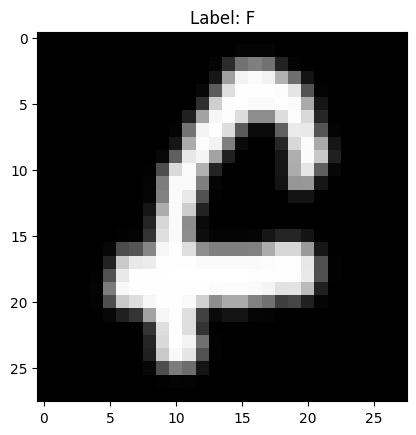

In [ ]:
image_index = 99

# Display the image
plt.imshow(train_images[image_index], cmap='gray')
plt.title(f"Label: {chr(train_labels[image_index]+64)}") #label into character
plt.show()

In [ ]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Simple CNN architecture
model1 = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(27, activation='softmax')  # 26 letters + 1 extra class
])

# Compile the model
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
model1.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6705 - loss: 1.1120 - val_accuracy: 0.8627 - val_loss: 0.4231
Epoch 2/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8882 - loss: 0.3467 - val_accuracy: 0.8888 - val_loss: 0.3401
Epoch 3/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9111 - loss: 0.2705 - val_accuracy: 0.8988 - val_loss: 0.3141
Epoch 4/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9211 - loss: 0.2376 - val_accuracy: 0.8950 - val_loss: 0.3166
Epoch 5/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9290 - loss: 0.2130 - val_accuracy: 0.9060 - val_loss: 0.2868
463/463 - 1s - 3ms/step - accuracy: 0.9060 - loss: 0.2868

Test accuracy: 0.9060071706771851


90% of accuracy on the first run, not that bad. Where are mistakes?

In [ ]:
# Predict labels for the test set
predicted_labels = np.argmax(model1.predict(test_images), axis=1)
# Convert numerical labels to characters
predicted_chars = [chr(label + 64) for label in predicted_labels]
true_chars = [chr(label + 64) for label in test_labels]

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


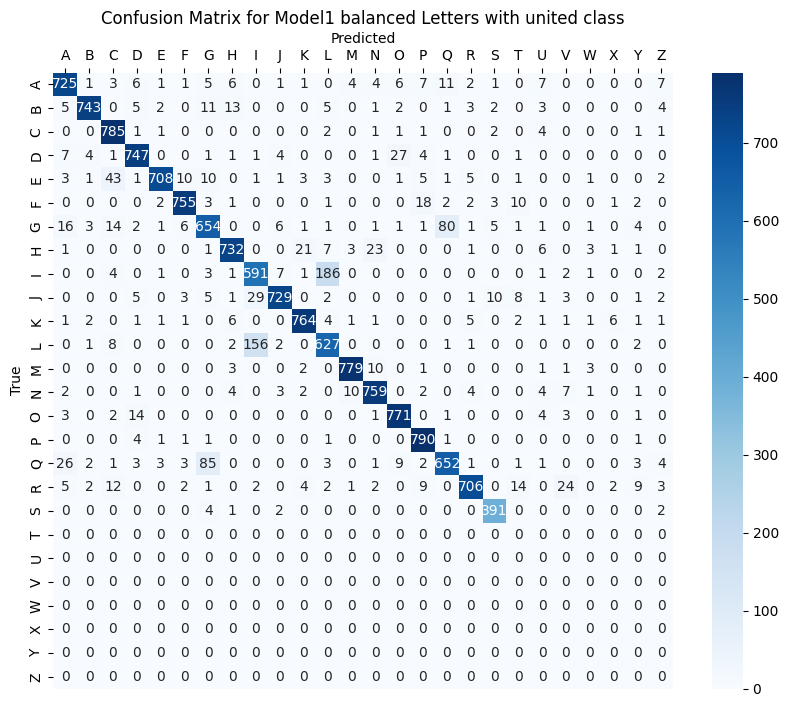

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(true_chars, predicted_chars)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(list(set(predicted_chars))), yticklabels=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model1 balanced Letters with united class')
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

L was interpreted as I and other way around, obviously because that differnce would be hardly recognized even by human, actually there is no difference :) Let's see on some examples

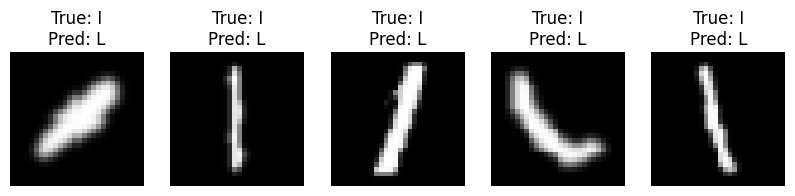

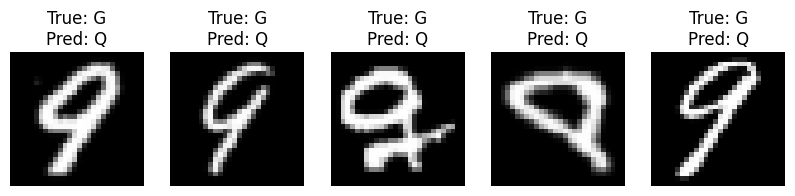

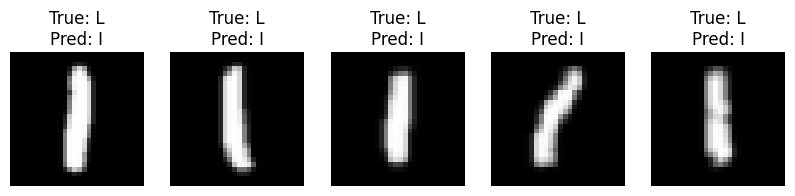

In [ ]:
# Function to display a misclassified image
def show_misclassified_images(true_chars, predicted_chars, test_images, true_char, pred_char, num_images=5):
    misclassified_indices = [i for i, (true, pred) in enumerate(zip(true_chars, predicted_chars)) if true == true_char and pred == pred_char]

    # Plot the first few misclassified images
    plt.figure(figsize=(10, 10))
    for i, index in enumerate(misclassified_indices[:num_images]):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_char}\nPred: {pred_char}")
        plt.axis('off')
    plt.show()

# Show misclassified 'I' as 'L'
show_misclassified_images(true_chars, predicted_chars, test_images, 'I', 'L')

# Show misclassified 'G' as 'Q'
show_misclassified_images(true_chars, predicted_chars, test_images, 'G', 'Q')

# Show misclassified 'I' as 'L'
show_misclassified_images(true_chars, predicted_chars, test_images, 'L', 'I')

Ok, l and I seem to be undisinguishable. But with g and q it seems that it could be improved. Let's try a bit more complicated model

In [ ]:
# another architecture with additional layers

# # Normalize the images
# train_images = train_images / 255.0
# test_images = test_images / 255.0

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(27, activation='softmax')  # 26 letters + 1 for background/unknown
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# # Reshape images to include channel dimension (1 for grayscale)
# train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
# test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6822 - loss: 1.0708 - val_accuracy: 0.8791 - val_loss: 0.3653
Epoch 2/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9046 - loss: 0.2864 - val_accuracy: 0.9005 - val_loss: 0.2896
Epoch 3/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9240 - loss: 0.2221 - val_accuracy: 0.9156 - val_loss: 0.2496
Epoch 4/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9346 - loss: 0.1882 - val_accuracy: 0.9116 - val_loss: 0.2582
Epoch 5/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9406 - loss: 0.1710 - val_accuracy: 0.9179 - val_loss: 0.2428
463/463 - 1s - 2ms/step - accuracy: 0.9179 - loss: 0.2428

Test accuracy: 0.9178998470306396


Ok, now it is a bit better, so where is an error?

In [ ]:
# Predict labels for the test set
predicted_labels = np.argmax(model.predict(test_images, verbose = 0), axis=1)
# Convert numerical labels to characters
predicted_chars = [chr(label + 64) for label in predicted_labels]
true_chars = [chr(label + 64) for label in test_labels]

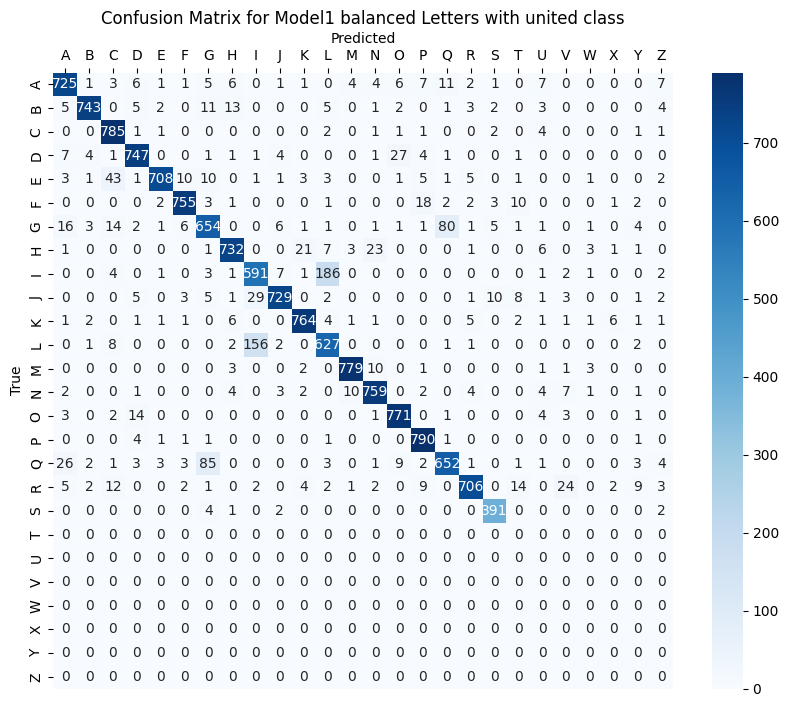

In [ ]:
conf_matrix = confusion_matrix(true_chars, predicted_chars)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(list(set(predicted_chars))), yticklabels=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model1 balanced Letters with united class')
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

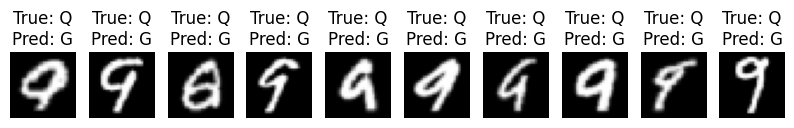

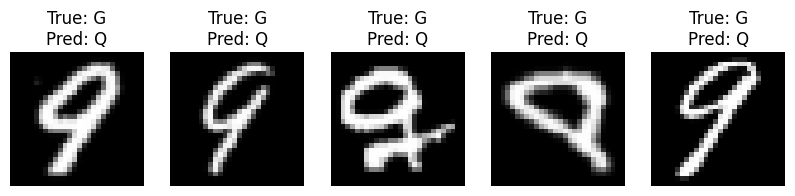

In [ ]:
# Show misclassified 'Q' as 'G'
show_misclassified_images(true_chars, predicted_chars, test_images, 'Q', 'G', num_images = 10)

# Show misclassified 'G' as 'Q'
show_misclassified_images(true_chars, predicted_chars, test_images, 'G', 'Q')


What if we will not combine Upper and lower cases in one class?

## Separate classes for Upper and lower cases

In [4]:
# Load training and test data
train_labels, train_images = load_image_data_from_csv('emnist-balanced-train.csv')
test_labels, test_images = load_image_data_from_csv('emnist-balanced-test.csv')

#### Mapping

In [5]:
# get real characters for labels, find mapping from emnist-balanced-mapping.txt where in first column is label and in second is ascii code

# read emnist-balanced-mapping.txt as dictionary where first column is key and second is value

mapping = {}
with open('emnist-balanced-mapping.txt', 'r') as file:
    for line in file:
        key, value = line.strip().split()
        mapping[key] = chr(int(value))

print(len(mapping))

mapping


47


{'0': '0',
 '1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 '6': '6',
 '7': '7',
 '8': '8',
 '9': '9',
 '10': 'A',
 '11': 'B',
 '12': 'C',
 '13': 'D',
 '14': 'E',
 '15': 'F',
 '16': 'G',
 '17': 'H',
 '18': 'I',
 '19': 'J',
 '20': 'K',
 '21': 'L',
 '22': 'M',
 '23': 'N',
 '24': 'O',
 '25': 'P',
 '26': 'Q',
 '27': 'R',
 '28': 'S',
 '29': 'T',
 '30': 'U',
 '31': 'V',
 '32': 'W',
 '33': 'X',
 '34': 'Y',
 '35': 'Z',
 '36': 'a',
 '37': 'b',
 '38': 'd',
 '39': 'e',
 '40': 'f',
 '41': 'g',
 '42': 'h',
 '43': 'n',
 '44': 'q',
 '45': 'r',
 '46': 't'}

In [ ]:
str(np.unique(train_labels))

[mapping[str(label)] for label in np.unique(train_labels)]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'd',
 'e',
 'f',
 'g',
 'h',
 'n',
 'q',
 'r',
 't']

In [ ]:
# with open('emnist-balanced-mapping.txt', 'r') as file:
#     for line in file:
#       key, value = line.strip().split()
#       print(int(key) - int(value))

-48
-48
-48
-48
-48
-48
-48
-48
-48
-48
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-61
-61
-62
-62
-62
-62
-62
-67
-69
-69
-70


In [ ]:
# # Normalize the images
# train_images = train_images / 255.0
# test_images = test_images / 255.0

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(47, activation='softmax')  # 37 distinct letters + 10 digits
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5488 - loss: 1.9588 - val_accuracy: 0.8191 - val_loss: 0.5541
Epoch 2/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8398 - loss: 0.4680 - val_accuracy: 0.8465 - val_loss: 0.4624
Epoch 3/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8612 - loss: 0.3937 - val_accuracy: 0.8505 - val_loss: 0.4354
Epoch 4/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8698 - loss: 0.3616 - val_accuracy: 0.8601 - val_loss: 0.4227
Epoch 5/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8761 - loss: 0.3376 - val_accuracy: 0.8561 - val_loss: 0.4181
588/588 - 2s - 3ms/step - accuracy: 0.8561 - loss: 0.4181

Test accuracy: 0.8561093807220459


That is even slightly worse. Where problems?

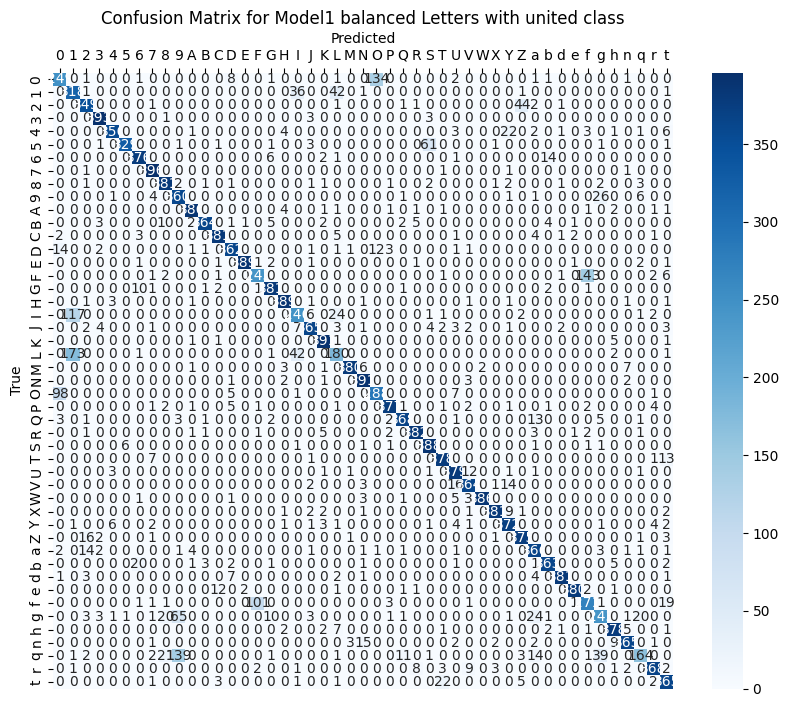

In [ ]:
# Predict labels for the test set
predicted_labels = np.argmax(model.predict(test_images, verbose = 0), axis=1)
# Convert numerical labels to characters
predicted_chars = [mapping[str(label)] for label in predicted_labels]
true_chars = [mapping[str(label)] for label in test_labels]

conf_matrix = confusion_matrix(true_chars, predicted_chars)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(list(set(predicted_chars))), yticklabels=sorted(list(set(true_chars))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model1 balanced Letters with united class')
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

Obviously we have now problems with 1 and 0 which are highlu similart to l, I and O. What if we exclude them?

In [ ]:
print(len(np.unique(train_labels)))
print(len(np.unique(test_labels)))
print(len(train_labels))
print(len(test_labels))
print(len(train_images))
print(len(test_images))

47
47
112799
18799
112799
18799


### Only letters (Excluding digits, should be executed!!!)

In [6]:


# excluding numbers train_labels, train_images, test_labels, test_images with lavels <10

train_mask = np.where(train_labels >= 10)
test_mask = np.where(test_labels >= 10)

train_labels = train_labels[train_mask]
train_images = train_images[train_mask]
test_labels = test_labels[test_mask]
test_images = test_images[test_mask]

In [ ]:
# print(len(np.unique(train_labels)))
# print(len(np.unique(test_labels)))
# print(len(train_labels))
# print(len(test_labels))
# print(len(train_images))
# print(len(test_images))

37
37
88799
14799
88799
14799


In [7]:
# execute necesseraly! to avoid errors
train_labels -= 10
test_labels -= 10

In [8]:
# # Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0


# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 37 distinct letters
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6481 - loss: 1.2514 - val_accuracy: 0.8722 - val_loss: 0.4186
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8861 - loss: 0.3517 - val_accuracy: 0.8886 - val_loss: 0.3413
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9033 - loss: 0.2924 - val_accuracy: 0.8992 - val_loss: 0.3195
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9153 - loss: 0.2483 - val_accuracy: 0.9047 - val_loss: 0.2982
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9199 - loss: 0.2332 - val_accuracy: 0.9096 - val_loss: 0.2856
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9259 - loss: 0.2102 - val_accuracy: 0.9088 - val_loss: 0.2865
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9290 - loss: 0.1989 - val_accuracy: 0.9080 - val_loss: 0.2924
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9336 - loss: 0.1793 

90% again where are errors? Let's see

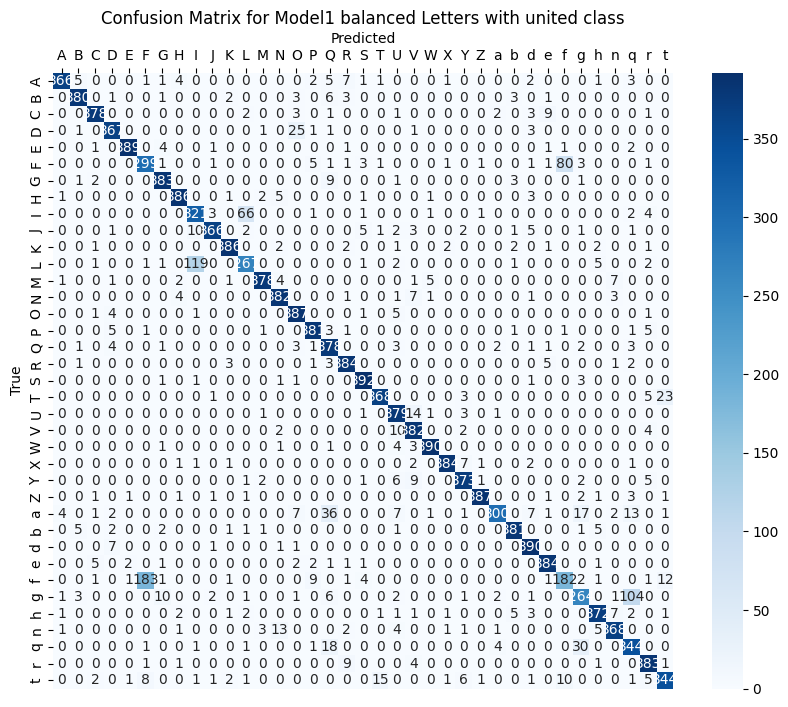

In [ ]:
# Predict labels for the test set
predicted_labels = np.argmax(model.predict(test_images, verbose = 0), axis=1)
# Convert numerical labels to characters
predicted_chars = [mapping[str(label+10)] for label in predicted_labels]
true_chars = [mapping[str(label+10)] for label in test_labels]

conf_matrix = confusion_matrix(true_chars, predicted_chars)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(list(set(predicted_chars))), yticklabels=sorted(list(set(true_chars))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model1 balanced Letters with united class')
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

In [9]:
# path to the 'models' folder in Google Drive
save_dir = '/content/drive/MyDrive/HSLU/CV/Project/saved_models'

os.makedirs(save_dir, exist_ok=True)


# Save the entire model in HDF5 format
model.save(os.path.join(save_dir, 'simple_model.h5'))

f and F, which we dont care about, and again l and I and g and q. How can we improve a bit?

#### More epochs



Epoch 1/15
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9257 - loss: 0.2066 - val_accuracy: 0.9076 - val_loss: 0.2880
Epoch 2/15
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9309 - loss: 0.1933 - val_accuracy: 0.9068 - val_loss: 0.2826
Epoch 3/15
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9344 - loss: 0.1763 - val_accuracy: 0.9053 - val_loss: 0.2926
Epoch 4/15
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9375 - loss: 0.1660 - val_accuracy: 0.9066 - val_loss: 0.2958
Epoch 5/15
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9424 - loss: 0.1537 - val_accuracy: 0.9078 - val_loss: 0.2954
Epoch 6/15
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9444 - loss: 0.1457 - val_accuracy: 0.9086 - val_loss: 0.2971
Epoch 7/15
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9487 - loss: 0.1342 - val_accuracy: 0.9086 - val_loss: 0.3188
Epoch 8/15
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9484 - loss: 0.1284 - 

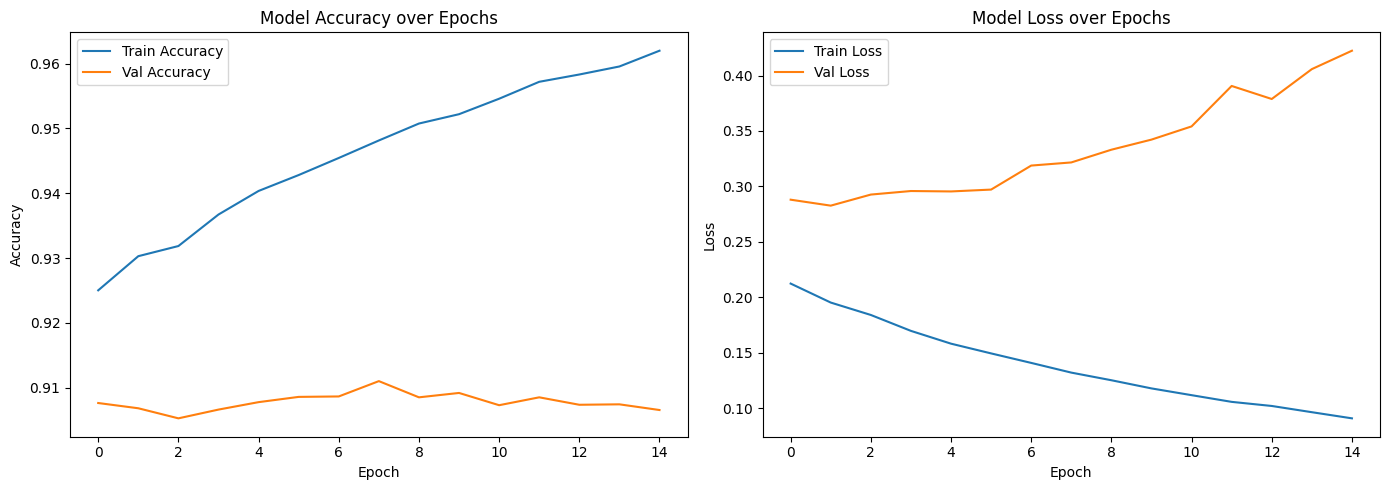

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Ok seems that 10(?) would be enough. What about adding learning rate?

#### Learning rate

In [ ]:
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 37 distinct letters
])

# Decrease the learning rate
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3777 - loss: 2.3328 - val_accuracy: 0.7365 - val_loss: 0.9302
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7627 - loss: 0.8148 - val_accuracy: 0.8074 - val_loss: 0.6611
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8257 - loss: 0.5907 - val_accuracy: 0.8311 - val_loss: 0.5695
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8477 - loss: 0.5004 - val_accuracy: 0.8501 - val_loss: 0.5035
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8605 - loss: 0.4512 - val_accuracy: 0.8590 - val_loss: 0.4620
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8745 - loss: 0.4084 - val_accuracy: 0.8675 - val_loss: 0.4303
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8797 - loss: 0.3827 - val_accuracy: 0.8711 - val_loss: 0.4230
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8875 - loss: 0.3634 - 

It did not help too much.

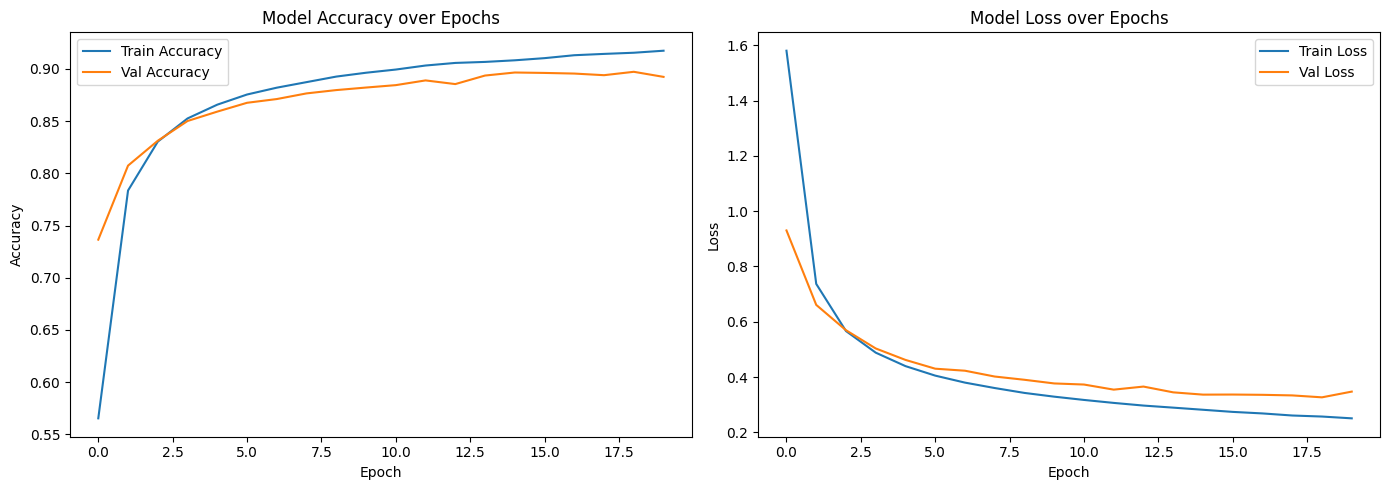

In [ ]:
#todiscuss remove this cell?
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Augmentation of data

In [ ]:
train_images.shape

(88799, 28, 28)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape to add channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# # Convert to float32 and normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(train_images)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 37 distinct letters
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=20,
                    validation_data=(test_images, test_labels))

Train images shape: (88799, 28, 28, 1)
Test images shape: (14799, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5252 - loss: 1.6817 - val_accuracy: 0.8680 - val_loss: 0.4181
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.8307 - loss: 0.5473 - val_accuracy: 0.8908 - val_loss: 0.3536
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8603 - loss: 0.4426 - val_accuracy: 0.8984 - val_loss: 0.3349
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 44s 32ms/step - accuracy: 0.8720 - loss: 0.3997 - val_accuracy: 0.8992 - val_loss: 0.3221
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 71s 24ms/step - accuracy: 0.8819 - loss: 0.3605 - val_accuracy: 0.8974 - val_loss: 0.3273
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.8868 - loss: 0.3450 - val_accuracy: 0.9116 - val_loss: 0.2809
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.8930 - loss: 0.3274 - val_accuracy: 0.9093 - val_loss: 0.2850
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.8948 - loss: 0.31

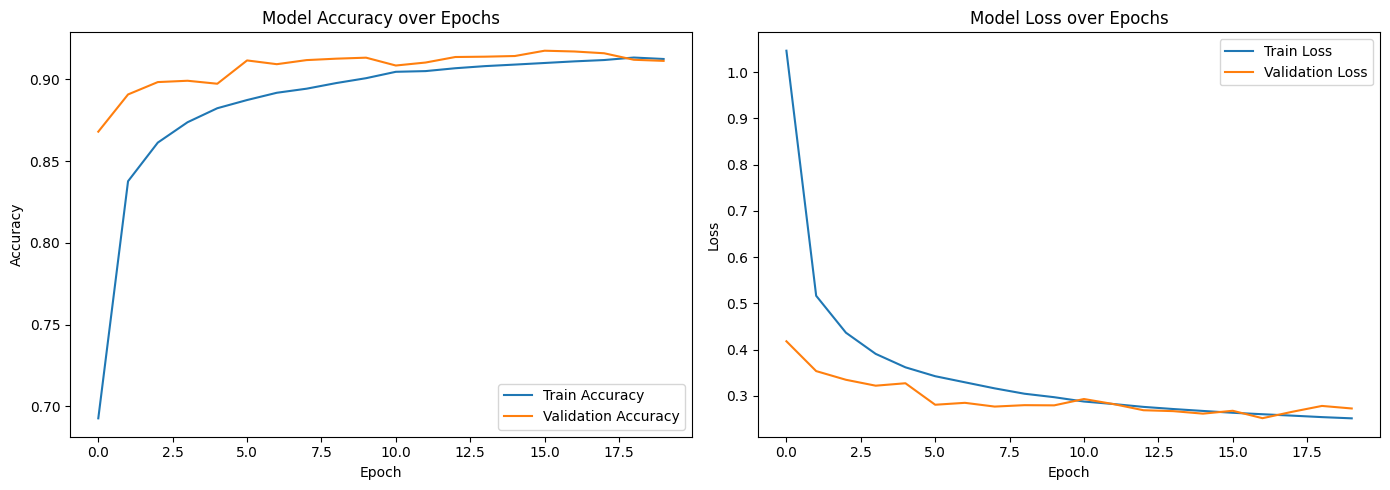

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### Another optimizer, RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Early stopping



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 37 distinct letters
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Train the model with early stopping
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=20,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6603 - loss: 1.2088 - val_accuracy: 0.8657 - val_loss: 0.4335
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8886 - loss: 0.3409 - val_accuracy: 0.8959 - val_loss: 0.3323
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9081 - loss: 0.2775 - val_accuracy: 0.9058 - val_loss: 0.3009
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9166 - loss: 0.2417 - val_accuracy: 0.9058 - val_loss: 0.2947
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9222 - loss: 0.2223 - val_accuracy: 0.9082 - val_loss: 0.2825
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9288 - loss: 0.2009 - val_accuracy: 0.9113 - val_loss: 0.2806
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9322 - loss: 0.1876 - val_accuracy: 0.9111 - val_loss: 0.2821
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9362 - loss: 0.1744 -

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.8397 - loss: 0.5343 - val_accuracy: 0.9021 - val_loss: 0.3214
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.8841 - loss: 0.3481 - val_accuracy: 0.9093 - val_loss: 0.2980
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8933 - loss: 0.3173 - val_accuracy: 0.9097 - val_loss: 0.2834
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8997 - loss: 0.2966 - val_accuracy: 0.9126 - val_loss: 0.2859
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.9013 - loss: 0.2858 - val_accuracy: 0.9051 - val_loss: 0.3157
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9063 - loss: 0.2758 - val_accuracy: 0.9122 - val_loss: 0.2831
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.9057 - loss: 0.2709 - val_accuracy: 0.9165 - val_loss: 0.2627
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9085 - loss: 0.26

#### More complex model


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(37, activation='softmax')  # Adjust according to num_classes
])

# Compile the updated model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')



Epoch 1/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.5478 - loss: 1.6764 - val_accuracy: 0.8759 - val_loss: 0.4020
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8350 - loss: 0.5296 - val_accuracy: 0.8879 - val_loss: 0.3436
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8546 - loss: 0.4529 - val_accuracy: 0.8976 - val_loss: 0.3157
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8709 - loss: 0.3991 - val_accuracy: 0.9063 - val_loss: 0.2918
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8771 - loss: 0.3798 - val_accuracy: 0.9086 - val_loss: 0.2835
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8855 - loss: 0.3525 - val_accuracy: 0.9100 - val_loss: 0.2819
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8853 - loss: 0.3524 - val_accuracy: 0.9122 - val_loss: 0.2678
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8902 - loss: 0.3352

#### Putting all together (The best choice: Augmentation, Early stopping, complex architecture)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 66s 40ms/step - accuracy: 0.4007 - loss: 2.2807 - val_accuracy: 0.8585 - val_loss: 0.4628
Epoch 2/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 56s 26ms/step - accuracy: 0.7497 - loss: 0.8178 - val_accuracy: 0.8906 - val_loss: 0.3512
Epoch 3/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7944 - loss: 0.6561 - val_accuracy: 0.8980 - val_loss: 0.3172
Epoch 4/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.8151 - loss: 0.5849 - val_accuracy: 0.8924 - val_loss: 0.3494
Epoch 5/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8241 - loss: 0.5562 - val_accuracy: 0.8965 - val_loss: 0.3340
Epoch 6/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8293 - loss: 0.5344 - val_accuracy: 0.9095 - val_loss: 0.2832
Epoch 7/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.8400 - loss: 0.5014 - val_accuracy: 0.9124 - val_loss: 0.2744
Epoch 8/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.8433 - loss: 0.49

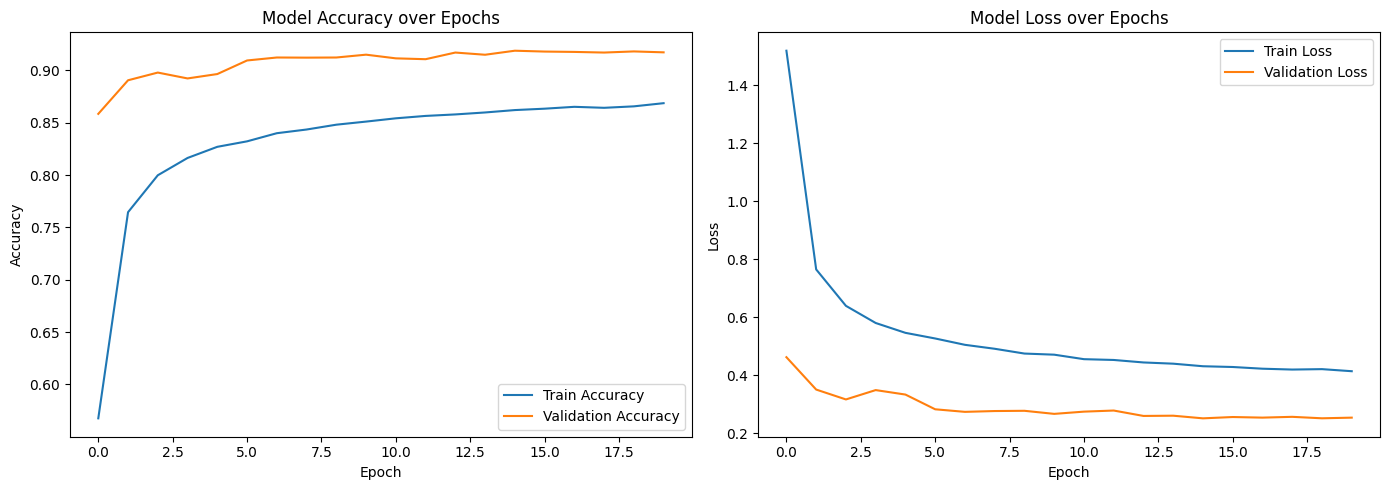

463/463 - 1s - 2ms/step - accuracy: 0.9188 - loss: 0.2520

Test accuracy: 0.9188458919525146
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       400
           1       0.95      0.98      0.96       400
           2       0.97      0.95      0.96       400
           3       0.95      0.93      0.94       400
           4       0.98      0.98      0.98       400
           5       0.70      0.51      0.59       400
           6       0.95      0.97      0.96       400
           7       0.96      0.99      0.97       400
           8       0.70      0.81      0.75       400
           9       0.97      0.94      0.95       400
          10       0.98      0.97      0.97       400
          11       0.79      0.66      0.72       400
          12       0.97      0.98      0.97       400
          13       0.93      0.98      0.96       400
          14       0.95      0.96      0.95       400
 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 1. Reshape and Normalize
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 2. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(train_images)

# 3. Define Enhanced Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(37, activation='softmax')  # Adjust according to num_classes
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 6. Train the Model
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=30,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

# 7. Plot Training History
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# 9. Classification Report
from sklearn.metrics import classification_report

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_labels))


Saving model

In [ ]:
# path to the 'models' folder in Google Drive
save_dir = '/content/drive/MyDrive/HSLU/CV/Project/saved_models'

os.makedirs(save_dir, exist_ok=True)


# Save the entire model in HDF5 format
model.save(os.path.join(save_dir, 'complex_model.h5'))


#### Loading model

In [ ]:
from tensorflow.keras.models import load_model

save_dir = '/content/drive/MyDrive/HSLU/CV/Project/saved_models'

loaded_model = load_model(os.path.join(save_dir, 'complex_model.h5'))


In [ ]:
test_images = test_images / 255.0

#### Diving deeper in errors

In [ ]:
#Classification Report
from sklearn.metrics import classification_report

predictions = loaded_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

test_labels_chr = [mapping[str(label+10)] for label in test_labels]
predicted_labels_chr = [mapping[str(label+10)] for label in predicted_labels]

print(classification_report(test_labels_chr, predicted_labels_chr))

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           A       0.96      0.98      0.97       400
           B       0.95      0.98      0.96       400
           C       0.97      0.95      0.96       400
           D       0.95      0.93      0.94       400
           E       0.98      0.98      0.98       400
           F       0.70      0.51      0.59       400
           G       0.95      0.97      0.96       400
           H       0.96      0.99      0.97       400
           I       0.70      0.81      0.75       400
           J       0.97      0.94      0.95       400
           K       0.98      0.97      0.97       400
           L       0.79      0.66      0.72       400
           M       0.97      0.98      0.97       400
           N       0.93      0.98      0.96       400
           O       0.95      0.96      0.95       400
           P       0.97      0.97      0.97       400
           Q       0.92      0.97      0

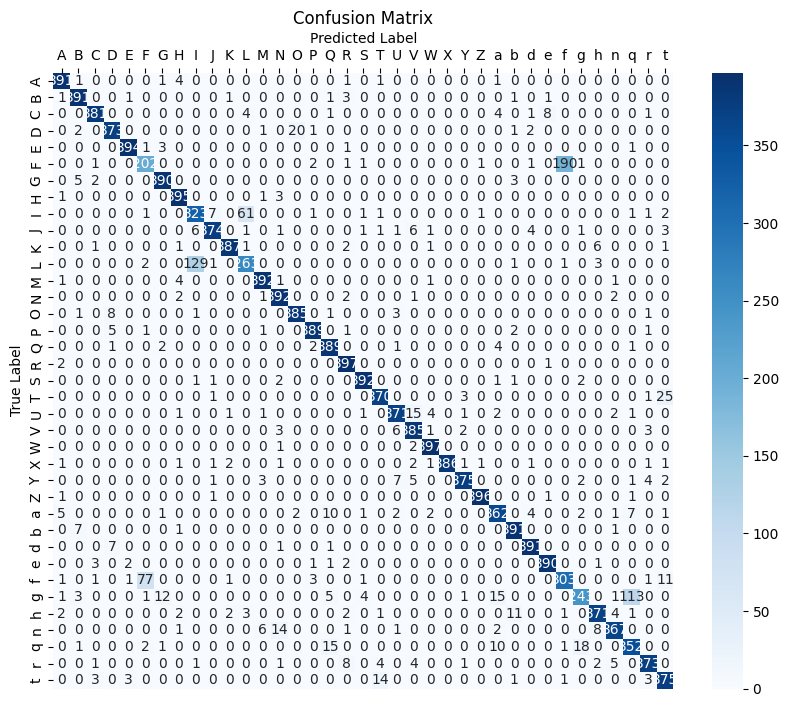

In [ ]:
cm = confusion_matrix(test_labels_chr, predicted_labels_chr)
class_labels = sorted(list(set(test_labels_chr)))  # Unique class labels

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

Misclassified L as I:


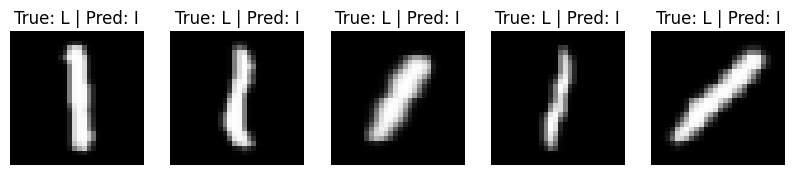

Misclassified g as q:


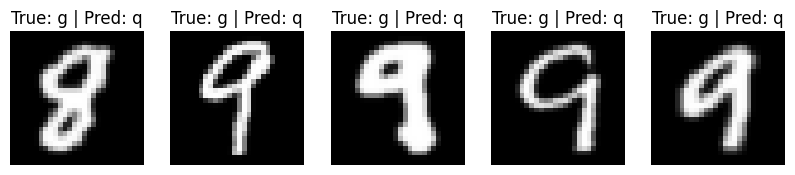

Misclassified D as O:


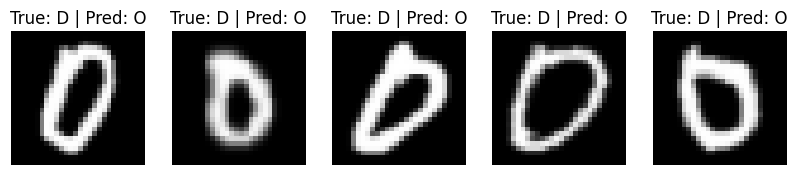

Misclassified Q as a:


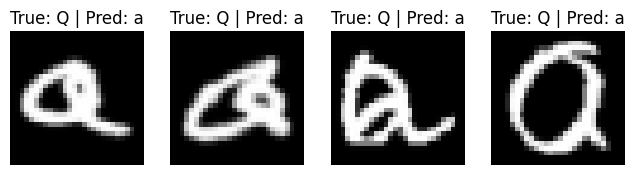

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the pairs of characters you want to visualize misclassifications for
misclassified_pairs = [
    ("L", "I"),
    ("g", "q"),
    ("D", "O"),
    ("Q", "a")
]

# Function to display misclassified images for specific pairs
def display_misclassifications(test_images, test_labels_chr, predicted_labels_chr, pairs, num_samples=5):
    for true_label, predicted_label in pairs:
        # Find indices where the true label is misclassified as the specified predicted label
        misclassified_indices = [
            i for i in range(len(test_labels_chr))
            if test_labels_chr[i] == true_label and predicted_labels_chr[i] == predicted_label
        ]

        # Limit the number of samples to display
        misclassified_indices = misclassified_indices[:num_samples]

        if misclassified_indices:
            print(f"Misclassified {true_label} as {predicted_label}:")
            plt.figure(figsize=(10, 2))
            for i, idx in enumerate(misclassified_indices):
                plt.subplot(1, num_samples, i + 1)
                plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
                plt.title(f"True: {true_label} | Pred: {predicted_label}")
                plt.axis("off")
            plt.show()
        else:
            print(f"No misclassifications found for {true_label} as {predicted_label}.")

# Call the function with your data
display_misclassifications(test_images, test_labels_chr, predicted_labels_chr, misclassified_pairs)


#### Testing with own images

In [ ]:
# from google.colab import files
from PIL import Image

img_dir = 'img'  # Adjust this path to your mounted location

# List all image files in the directory
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png'))]

In [ ]:
image_files

['n.png', 'o.png', 'i.png', 's.png', 'c.png', 'vision.png', 'm.png', 'v.png']

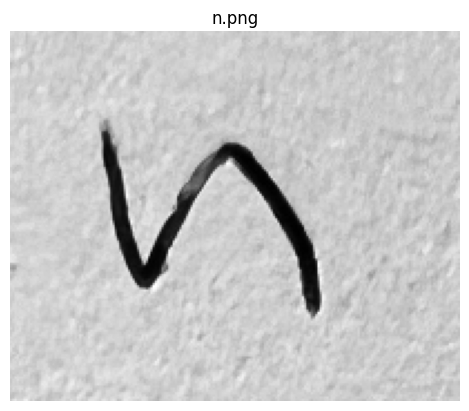

In [ ]:
img_name = 'n.png'

img_path = os.path.join(img_dir, img_name)
img = Image.open(img_path).convert("L")
plt.imshow(img, cmap="gray")
plt.title(img_name)
plt.axis("off")
plt.show()

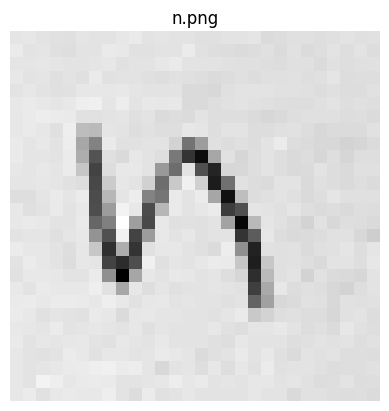

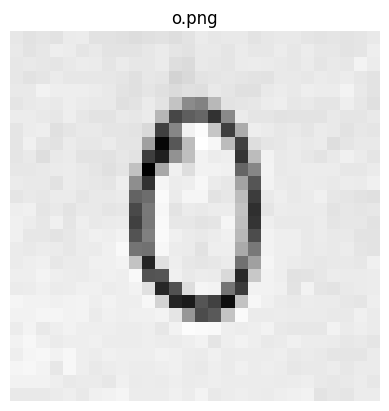

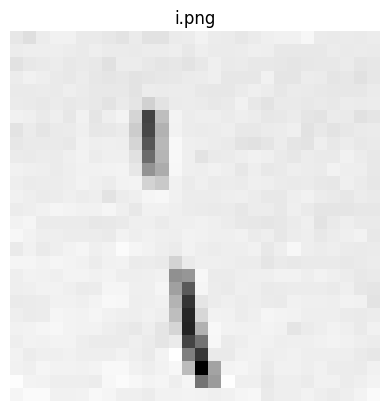

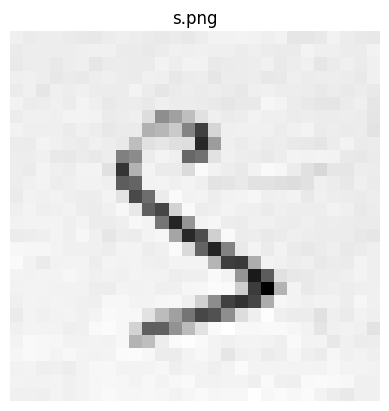

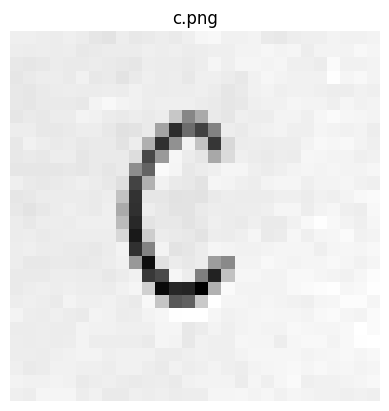

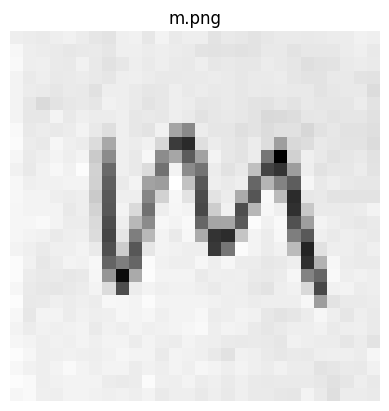

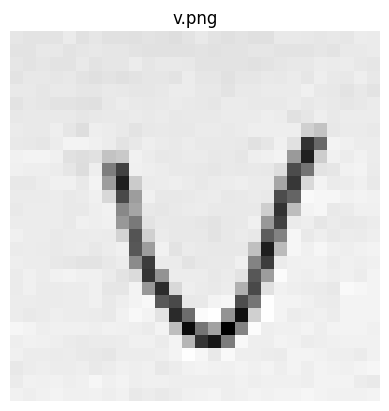

In [ ]:

image_files.remove('vision.png')

# Display and resize each image
for img_name in image_files:
    img_path = os.path.join(img_dir, img_name)
    img = Image.open(img_path).convert("L")  # Open image and convert to grayscale
    img_resized = img.resize((28, 28))  # Resize to 28x28

    # Display the resized image
    plt.imshow(img_resized, cmap="gray")
    plt.title(img_name)
    plt.axis("off")
    plt.show()

Array for n.png:
[[163 164 162 160 159 163 161 162 164 166 162 163 161 162 159 159 161 162
  163 156 157 159 159 158 159 161 159 160]
 [167 162 163 159 158 162 161 166 165 160 160 162 162 167 160 158 157 156
  157 159 156 160 156 158 161 158 161 157]
 [163 163 164 163 161 162 163 164 160 162 162 164 166 162 161 161 160 159
  159 158 157 159 159 156 160 158 159 160]
 [165 162 163 159 161 159 166 160 162 162 159 158 160 159 158 156 157 159
  157 159 159 160 158 159 163 157 158 158]
 [161 164 162 159 160 164 164 164 165 163 161 162 162 155 155 154 159 161
  161 161 160 160 159 157 159 157 157 160]
 [165 166 165 163 165 169 170 163 168 162 165 164 165 155 155 158 160 161
  160 159 158 157 157 159 161 158 159 158]
 [164 166 168 167 166 160 160 161 163 159 161 156 157 156 161 158 158 158
  156 153 155 158 159 159 159 157 158 156]
 [164 166 164 159 169 135 133 163 161 158 160 158 158 164 163 158 161 161
  157 157 159 160 157 154 156 156 156 160]
 [166 163 165 162 168 120  94 166 160 160 162 1

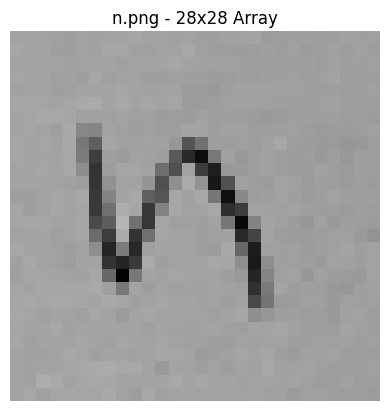

Array for o.png:
[[174 171 173 171 176 177 171 171 170 168 170 171 169 172 176 174 175 175
  172 174 175 175 173 172 173 172 173 175]
 [175 172 174 178 177 173 175 172 172 172 174 176 173 171 175 175 173 176
  174 174 177 174 177 174 174 172 173 178]
 [174 175 174 173 175 177 176 173 176 174 174 176 169 167 175 174 173 176
  177 176 175 174 176 173 175 174 181 177]
 [174 171 173 176 174 174 174 174 173 170 174 173 163 166 172 173 174 173
  172 171 175 175 174 176 175 177 174 172]
 [175 175 180 178 178 178 177 175 172 170 173 170 167 170 169 175 173 170
  170 175 177 175 178 177 177 181 175 172]
 [173 175 176 175 178 176 175 175 170 172 176 172 153 121 116 147 172 173
  174 177 178 174 175 173 173 178 174 170]
 [177 177 175 174 178 174 172 172 175 174 176 146  82  95 100  70 120 176
  173 173 171 172 172 172 175 173 173 175]
 [173 177 178 170 173 175 175 173 173 172 166  78 118 180 186 155  77 140
  178 176 174 175 173 176 175 171 174 173]
 [173 179 173 171 176 174 174 176 173 173 133  

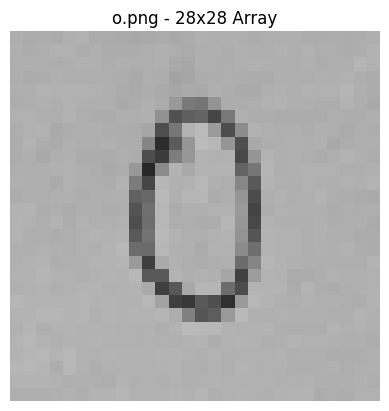

Array for i.png:
[[173 168 177 180 180 175 175 173 171 176 170 170 176 177 181 177 176 173
  176 179 180 180 184 176 175 176 175 177]
 [177 178 178 178 177 175 178 176 176 175 177 177 178 174 178 176 176 177
  179 178 174 174 174 174 177 175 176 175]
 [170 174 175 177 174 175 174 169 177 177 174 172 173 171 174 179 175 176
  174 174 173 172 173 174 174 176 172 173]
 [177 180 178 175 174 177 173 172 173 171 172 173 174 176 177 179 173 173
  173 180 172 172 177 176 172 173 169 173]
 [175 175 176 175 178 176 174 174 174 171 177 176 177 177 174 173 173 176
  179 177 173 176 175 174 173 173 173 176]
 [176 175 174 176 174 175 174 171 175 172 158 171 176 177 176 174 175 180
  174 171 175 175 174 175 174 177 176 177]
 [180 179 175 178 173 180 172 178 182 161  61 145 182 177 178 178 176 178
  177 173 174 176 172 171 176 175 169 172]
 [171 176 172 175 176 179 173 174 176 155  64 137 181 177 176 177 178 174
  174 176 177 179 170 174 171 173 175 176]
 [173 175 175 175 174 180 178 179 178 161  74 1

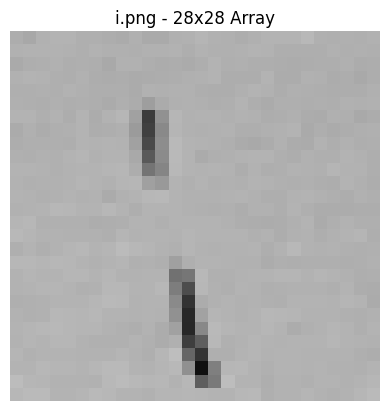

Array for s.png:
[[177 173 175 175 173 172 171 174 176 175 173 172 173 171 175 178 178 179
  178 176 178 170 170 172 178 174 172 171]
 [173 175 175 175 175 176 177 177 173 173 172 174 177 176 177 176 176 174
  176 174 173 173 180 176 176 174 174 178]
 [172 175 175 172 175 176 170 173 174 173 173 178 175 178 178 172 173 174
  175 177 172 175 177 170 173 176 173 177]
 [176 177 175 171 173 172 175 176 174 173 177 176 171 174 175 170 174 174
  175 171 172 176 174 175 175 174 172 177]
 [173 177 170 176 175 177 174 174 174 179 174 170 173 175 173 175 173 171
  176 177 175 175 174 172 174 172 174 172]
 [178 174 175 177 174 179 176 172 174 174 172 176 174 174 173 172 170 172
  172 181 179 174 172 170 169 173 176 170]
 [174 177 177 176 180 179 178 173 175 176 163 107 120 141 166 176 173 175
  178 176 176 174 175 174 174 175 174 169]
 [178 176 176 176 173 177 175 171 173 173 132 136 150  99  51 158 176 177
  177 177 174 177 179 173 175 173 174 168]
 [174 174 179 177 175 173 177 175 172 141 166 1

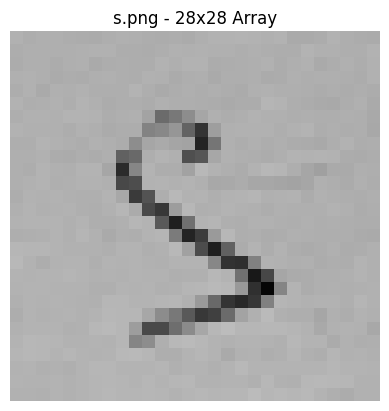

Array for c.png:
[[173 173 172 171 173 171 168 167 172 169 170 172 170 173 177 178 174 174
  175 170 169 172 173 173 175 174 174 175]
 [172 171 172 171 172 169 170 171 171 171 173 172 173 171 172 173 173 175
  175 177 175 176 172 175 175 175 178 176]
 [169 168 169 171 170 170 171 170 169 168 172 171 171 170 172 176 173 176
  176 175 176 173 173 171 179 174 174 175]
 [168 170 172 172 170 174 169 170 167 170 173 171 172 169 173 173 171 169
  174 177 175 174 174 174 181 176 178 175]
 [169 168 170 171 172 171 171 172 171 174 172 171 172 172 173 171 168 170
  174 175 173 174 174 173 172 172 174 173]
 [169 168 170 170 170 169 175 178 175 174 172 173 173 173 171 170 168 169
  173 174 174 176 175 175 173 176 174 175]
 [168 170 169 171 171 175 174 171 170 172 170 172 151 115 135 170 168 173
  172 172 175 175 173 177 179 177 176 175]
 [172 172 169 169 170 172 172 169 165 167 170 131  66 101  77 113 172 170
  173 174 175 173 173 176 175 174 175 172]
 [169 174 172 170 171 169 170 170 167 172 138  

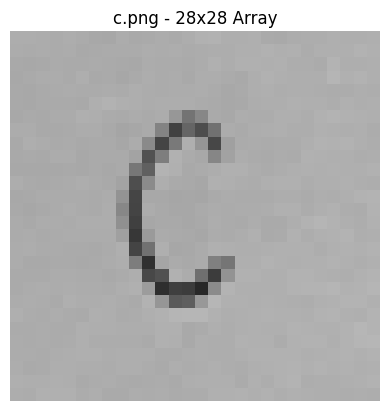

Array for m.png:
[[168 167 166 168 170 167 163 162 169 170 164 171 166 168 168 162 165 164
  162 164 166 166 165 166 167 167 170 169]
 [174 168 167 166 164 165 166 163 169 169 167 168 167 166 162 161 162 160
  162 165 165 162 164 164 164 167 169 165]
 [175 168 169 166 165 170 165 161 164 168 166 168 166 165 168 164 165 164
  164 167 165 163 159 161 162 166 167 166]
 [172 166 168 165 166 167 165 163 168 169 167 165 165 166 166 167 166 164
  166 166 167 163 162 162 165 165 162 161]
 [172 167 166 163 166 165 160 168 168 166 163 164 168 165 167 165 166 164
  166 165 166 165 165 162 164 165 165 157]
 [172 164 156 162 164 165 163 170 168 166 162 164 168 167 163 164 166 164
  162 161 164 162 165 163 163 163 167 162]
 [172 164 164 171 165 169 167 167 169 164 165 164 168 166 161 164 165 164
  162 155 156 158 163 164 162 163 163 160]
 [175 165 167 165 167 171 165 159 169 164 162 170 123 106 167 163 163 159
  162 157 160 160 154 161 164 161 161 159]
 [176 167 165 173 169 167 157 125 169 167 170 1

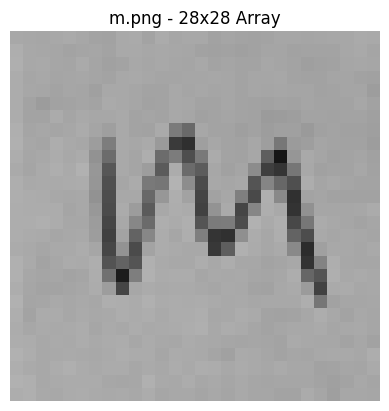

Array for v.png:
[[174 172 173 173 177 171 174 171 171 170 172 171 169 172 176 173 170 172
  170 170 176 176 175 174 175 174 178 177]
 [173 173 175 175 173 174 175 174 174 172 171 171 171 171 172 171 173 172
  174 174 173 172 173 174 173 176 176 177]
 [174 173 174 172 172 176 173 174 174 178 174 176 176 175 173 172 172 173
  171 172 174 175 175 178 177 178 175 174]
 [173 175 175 174 175 173 170 172 170 172 174 174 173 178 174 174 171 174
  174 176 175 177 174 179 176 175 179 175]
 [176 176 174 176 176 174 174 176 175 174 174 175 178 178 175 175 173 176
  176 177 177 177 180 176 175 172 175 173]
 [173 175 174 173 173 171 170 175 178 176 175 176 177 176 175 174 177 177
  176 176 176 178 175 177 176 174 175 177]
 [175 176 176 176 176 174 175 176 176 177 176 177 175 176 176 176 177 177
  177 179 178 171 174 179 176 178 178 178]
 [177 176 176 179 174 169 179 178 176 172 175 176 175 175 177 177 176 177
  179 179 179 179 160 152 175 177 177 176]
 [176 175 174 178 183 183 180 178 173 175 179 1

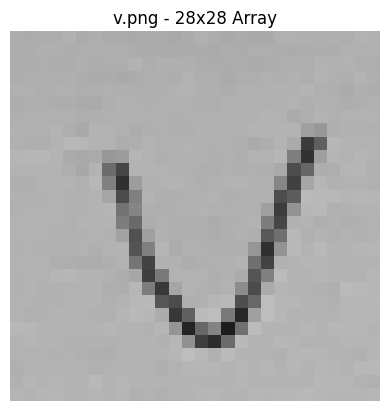

In [ ]:
# Process each image
for img_name in image_files:
    img_path = os.path.join(img_dir, img_name)

    # Open the original image and convert to grayscale
    img = Image.open(img_path).convert("L")  # "L" mode converts to grayscale

    # Resize the image to 28x28
    img_resized = img.resize((28, 28))

    # Convert the resized image to a NumPy array with pixel values in the range 0-255
    img_array = np.array(img_resized, dtype=np.uint8)

    # Display the array and the image for reference
    print(f"Array for {img_name}:")
    print(img_array)  # Print the array values

    plt.imshow(img_array, cmap="gray", vmin=0, vmax=255)
    plt.title(f"{img_name} - 28x28 Array")
    plt.axis("off")
    plt.show()

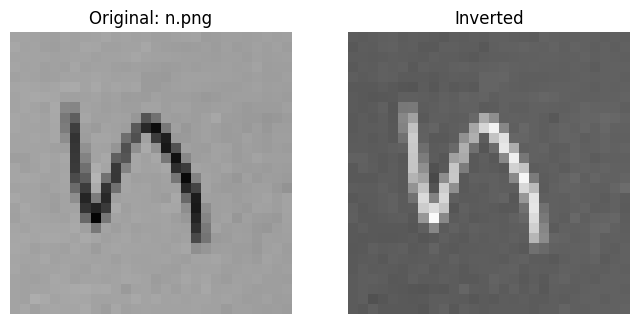

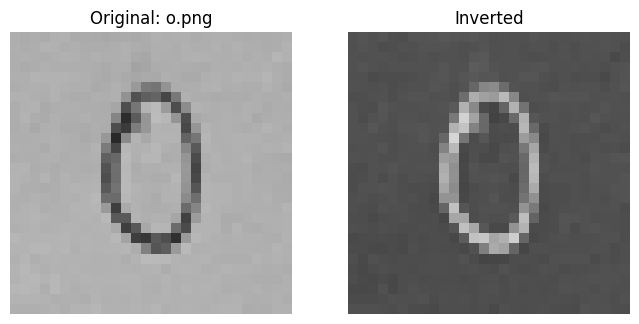

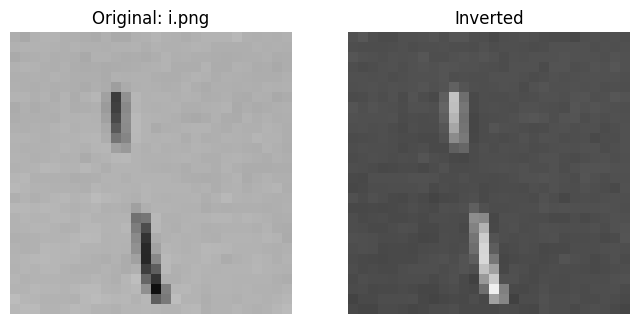

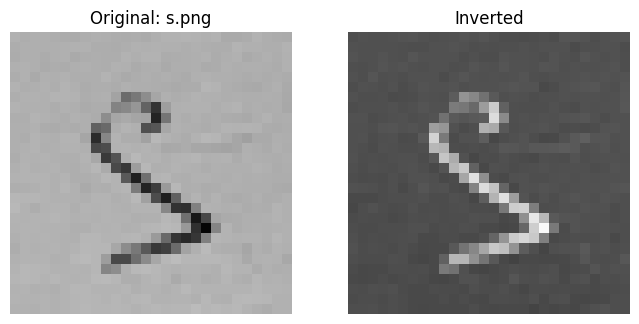

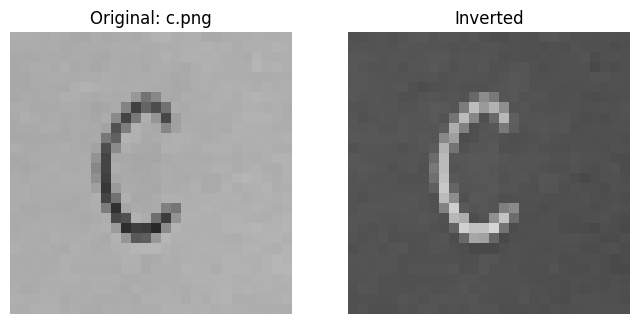

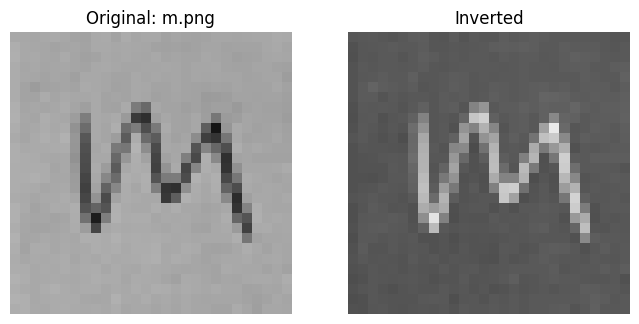

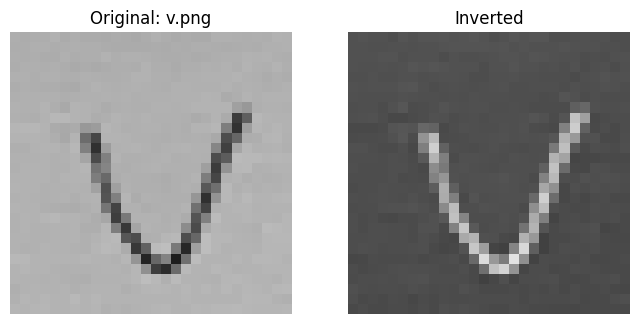

In [ ]:
# Process each image
for img_name in image_files:
    img_path = os.path.join(img_dir, img_name)

    # Open the original image and convert to grayscale
    img = Image.open(img_path).convert("L")  # "L" mode converts to grayscale

    # Resize the image to 28x28
    img_resized = img.resize((28, 28))

    # Convert the resized image to a NumPy array with pixel values in the range 0-255
    img_array = np.array(img_resized, dtype=np.uint8)

    # Invert the image (make white as black and black as white)
    img_inverted = 255 - img_array

    # Display the original and inverted images
    plt.figure(figsize=(8, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap="gray", vmin=0, vmax=255)
    plt.title(f"Original: {img_name}")
    plt.axis("off")

    # Inverted image
    plt.subplot(1, 2, 2)
    plt.imshow(img_inverted, cmap="gray", vmin=0, vmax=255)
    plt.title("Inverted")
    plt.axis("off")

    plt.show()

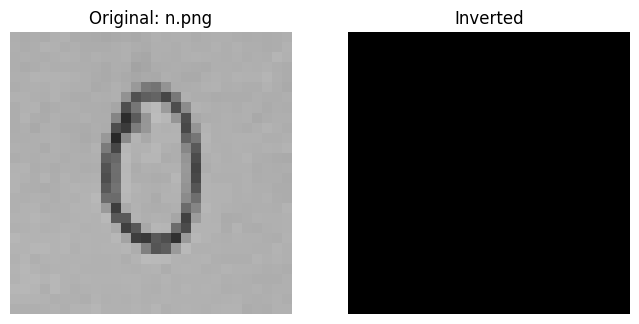

In [ ]:
# Define the path to the img directory and image file
img_dir = 'img'  # Adjust this path if necessary
img_path = os.path.join(img_dir, 'o.png')  # Path to n.png

# Open the image and convert to grayscale
img = Image.open(img_path).convert("L")  # "L" mode converts to grayscale

# Resize the image to 28x28
img_resized = img.resize((28, 28))

# Convert the resized image to a NumPy array with pixel values in the range 0-255
img_array = np.array(img_resized, dtype=np.uint8)

# Invert the image (make white as black and black as white)
o_array = 255 - img_array

# Display the original and inverted images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap="gray", vmin=0, vmax=255)
plt.title("Original: n.png")
plt.axis("off")

# Inverted image
plt.subplot(1, 2, 2)
plt.imshow(n_array, cmap="gray", vmin=0, vmax=255)
plt.title("Inverted")
plt.axis("off")

plt.show()

In [ ]:
o_array

array([[ 81,  84,  82,  84,  79,  78,  84,  84,  85,  87,  85,  84,  86,
         83,  79,  81,  80,  80,  83,  81,  80,  80,  82,  83,  82,  83,
         82,  80],
       [ 80,  83,  81,  77,  78,  82,  80,  83,  83,  83,  81,  79,  82,
         84,  80,  80,  82,  79,  81,  81,  78,  81,  78,  81,  81,  83,
         82,  77],
       [ 81,  80,  81,  82,  80,  78,  79,  82,  79,  81,  81,  79,  86,
         88,  80,  81,  82,  79,  78,  79,  80,  81,  79,  82,  80,  81,
         74,  78],
       [ 81,  84,  82,  79,  81,  81,  81,  81,  82,  85,  81,  82,  92,
         89,  83,  82,  81,  82,  83,  84,  80,  80,  81,  79,  80,  78,
         81,  83],
       [ 80,  80,  75,  77,  77,  77,  78,  80,  83,  85,  82,  85,  88,
         85,  86,  80,  82,  85,  85,  80,  78,  80,  77,  78,  78,  74,
         80,  83],
       [ 82,  80,  79,  80,  77,  79,  80,  80,  85,  83,  79,  83, 102,
        134, 139, 108,  83,  82,  81,  78,  77,  81,  80,  82,  82,  77,
         81,  85],
       [ 78,  78,  80,  81,  77,  81,  83,  83,  80,  81,  79, 109, 173,
        160, 155, 185, 135,  79,  82,  82,  84,  83,  83,  83,  80,  82,
         82,  80],
       [ 82,  78,  77,  85,  82,  80,  80,  82,  82,  83,  89, 177, 137,
         75,  69, 100, 178, 115,  77,  79,  81,  80,  82,  79,  80,  84,
         81,  82],
       [ 82,  76,  82,  84,  79,  81,  81,  79,  82,  82, 122, 210, 164,
        105,  67,  72, 106, 177,  86,  82,  81,  79,  80,  79,  86,  82,
         80,  80],
       [ 82,  80,  86,  80,  79,  83,  83,  84,  81,  83, 178, 196, 130,
        104,  75,  78,  77, 183, 106,  75,  80,  79,  81,  83,  80,  76,
         79,  82],
       [ 81,  81,  80,  79,  78,  80,  82,  85,  82, 103, 214, 117,  76,
         86,  75,  75,  76, 156, 137,  74,  80,  79,  78,  78,  78,  81,
         81,  79],
       [ 79,  80,  80,  84,  78,  80,  81,  82,  77, 132, 185,  73,  78,
         77,  72,  79,  81, 120, 165,  75,  79,  80,  78,  79,  80,  78,
         79,  76],
       [ 82,  80,  81,  79,  79,  82,  80,  80,  79, 157, 151,  70,  79,
         73,  73,  83,  81, 106, 179,  80,  77,  80,  79,  76,  81,  82,
         84,  85],
       [ 77,  76,  82,  80,  83,  80,  80,  82,  81, 172, 144,  72,  83,
         79,  80,  78,  78, 102, 187,  82,  78,  79,  79,  79,  83,  81,
         82,  81],
       [ 76,  78,  81,  76,  82,  77,  80,  79,  78, 177, 145,  71,  81,
         81,  83,  82,  73, 104, 183,  77,  80,  80,  80,  78,  82,  81,
         81,  84],
       [ 76,  81,  81,  83,  81,  78,  76,  77,  75, 166, 140,  70,  76,
         79,  80,  78,  76, 108, 170,  75,  77,  77,  80,  78,  80,  80,
         83,  83],
       [ 79,  80,  78,  79,  81,  78,  79,  76,  71, 147, 148,  72,  78,
         79,  84,  77,  77, 116, 145,  75,  77,  77,  80,  79,  80,  78,
         82,  83],
       [ 79,  77,  76,  81,  79,  79,  76,  76,  74, 101, 193,  85,  77,
         81,  82,  81,  79, 148, 122,  73,  77,  79,  80,  81,  80,  80,
         81,  76],
       [ 77,  77,  74,  77,  78,  79,  77,  76,  77,  71, 166, 165,  76,
         80,  78,  79,  89, 190,  99,  75,  77,  84,  83,  81,  78,  79,
         79,  78],
       [ 79,  78,  76,  79,  78,  76,  76,  78,  77,  75,  85, 192, 167,
         87,  73,  74, 147, 180,  75,  75,  76,  83,  75,  82,  83,  80,
         79,  78],
       [ 73,  75,  75,  76,  75,  74,  77,  75,  77,  77,  72,  92, 193,
        199, 165, 176, 206, 101,  72,  76,  79,  80,  78,  79,  79,  81,
         82,  77],
       [ 75,  75,  73,  73,  75,  74,  79,  76,  77,  76,  76,  74,  82,
        127, 170, 162, 101,  70,  79,  79,  78,  79,  79,  79,  80,  80,
         76,  79],
       [ 78,  74,  80,  77,  75,  77,  77,  77,  78,  78,  77,  81,  75,
         69,  70,  71,  77,  78,  77,  75,  80,  81,  81,  81,  75,  79,
         77,  79],
       [ 75,  72,  76,  79,  77,  77,  76,  78,  78,  78,  77,  78,  79,
         77,  75,  82,  77,  75,  77,  80,  79,  76,  78,  78,  79,  81,
         80,  82],
       [ 77,  73,  72,  75,  72,  77,  7

In [ ]:
o_array = o_array /255.0

In [ ]:
s_array

array([[0.32156863, 0.34117647, 0.30588235, 0.29411765, 0.29411765,
        0.31372549, 0.31372549, 0.32156863, 0.32941176, 0.30980392,
        0.33333333, 0.33333333, 0.30980392, 0.30588235, 0.29019608,
        0.30588235, 0.30980392, 0.32156863, 0.30980392, 0.29803922,
        0.29411765, 0.29411765, 0.27843137, 0.30980392, 0.31372549,
        0.30980392, 0.31372549, 0.30588235],
       [0.30588235, 0.30196078, 0.30196078, 0.30196078, 0.30588235,
        0.31372549, 0.30196078, 0.30980392, 0.30980392, 0.31372549,
        0.30588235, 0.30588235, 0.30196078, 0.31764706, 0.30196078,
        0.30980392, 0.30980392, 0.30588235, 0.29803922, 0.30196078,
        0.31764706, 0.31764706, 0.31764706, 0.31764706, 0.30588235,
        0.31372549, 0.30980392, 0.31372549],
       [0.33333333, 0.31764706, 0.31372549, 0.30588235, 0.31764706,
        0.31372549, 0.31764706, 0.3372549 , 0.30588235, 0.30588235,
        0.31764706, 0.3254902 , 0.32156863, 0.32941176, 0.31764706,
        0.29803922, 0.3137

In [ ]:
type(n_array)
# test_images[0].shape

numpy.ndarray

In [ ]:
predictions_s = loaded_model.predict(s_array.reshape(1, 28, 28))
predicted_labels = np.argmax(predictions_s, axis=1)


predicted_labels_chr = [mapping[str(label+10)] for label in predicted_labels]

predicted_labels_chr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


['S']

In [ ]:
predictions_o = loaded_model.predict(o_array.reshape(1, 28, 28))
predicted_labels = np.argmax(predictions_o, axis=1)


predicted_labels_chr = [mapping[str(label+10)] for label in predicted_labels]

predicted_labels_chr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


['O']

In [ ]:
test_images.shape

(14799, 28, 28)

## Notes

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [ ]:

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Ensure train_labels are in the correct range (0-36)
print(np.unique(train_labels))  # Check unique values

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 36 letters + 1 for unknown
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46]
Epoch 1/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0275 - loss: nan - val_accuracy: 0.0270 - val_loss: nan
Epoch 2/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0276 - loss: nan - val_accuracy: 0.0270 - val_loss: nan
Epoch 3/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0270 - loss: nan - val_accuracy: 0.0270 - val_loss: nan
Epoch 4/5
1138/1388 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0261 - loss: nan

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,
          9,  32,  37,  21,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  46, 114,
        140, 204, 215, 170,  78,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  90, 207, 244,
        246, 249, 250, 251, 206,  46,   8,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,  27, 186, 231, 204,
        140, 127, 141, 222, 245, 128,  47,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  

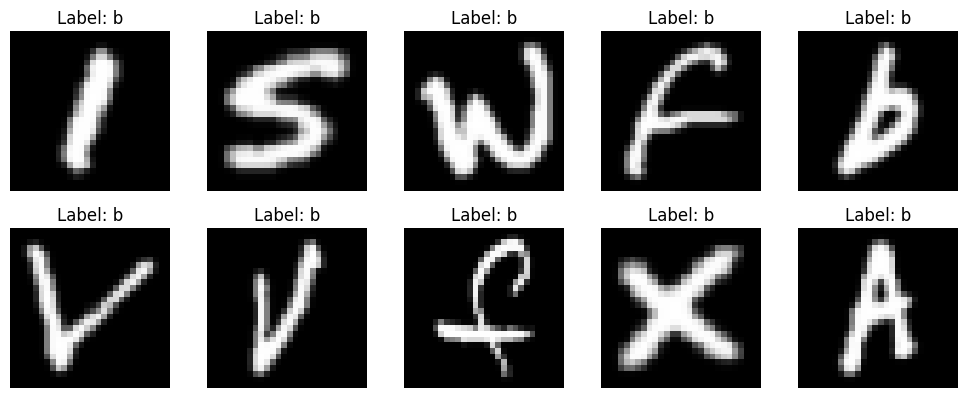

In [ ]:
def plot_random_images(images, labels, mapping, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        # Select a random index
        idx = np.random.randint(0, len(images))

        # Get the corresponding image and label
        img = images[idx]
        label = labels[idx]

        # Map label to character using the dictionary
        label_char = mapping.get(label, 'b')  # '?' for unmapped labels

        # Plot the image with label
        plt.subplot(5, 5, i + 1)  # Adjust rows/cols based on num_images
        plt.imshow(img.squeeze(), cmap='gray')  # Squeeze to remove single channel dimension if present
        plt.title(f"Label: {label_char}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_random_images(train_images, train_labels, mapping, num_images=10)

In [ ]:
len(np.unique(train_labels))

37

G


(-0.5, 27.5, 27.5, -0.5)

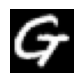

In [ ]:
idx = 8
print(mapping[str(test_labels[idx])])



plt.subplot(5, 5, 1)  # Adjust rows/cols based on num_images
plt.imshow(test_images[idx].squeeze(), cmap='gray')  # Squeeze to remove single channel dimension if present
# plt.title(f"Label: {label_char}")
plt.axis('off')

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568627, 0.03529412, 0.1254902 ,
        0.14509804, 0.0823

In [ ]:
type(train_labels[0])

np.isnan(train_images).any(), np.isnan(train_labels).any()

(False, False)

In [ ]:
len(np.unique(train_labels))

assert not np.isnan(train_images).any(), "train_images contains NaN values"
assert not np.isnan(train_labels).any(), "train_labels contains NaN values"

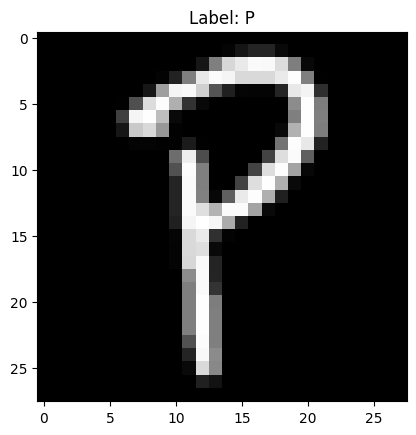

In [ ]:
image_index = 999

# Display the image
plt.imshow(train_images[image_index], cmap='gray')
plt.title(f"Label: {mapping[str(train_labels[image_index])]}") #label into character
plt.show()

## Garbage

In [ ]:

train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568627, 0.03529412, 0.1254902 ,
        0.14509804, 0.0823

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568627, 0.03529412, 0.1254902 ,
        0.14509804, 0.0823

In [ ]:
u_labels = np.unique(train_labels)

[mapping[str(label)] for label in u_labels]

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'd',
 'e',
 'f',
 'g',
 'h',
 'n',
 'q',
 'r',
 't']

In [ ]:

len( np.unique(train_labels))

37

In [ ]:
mapping['11']

'B'

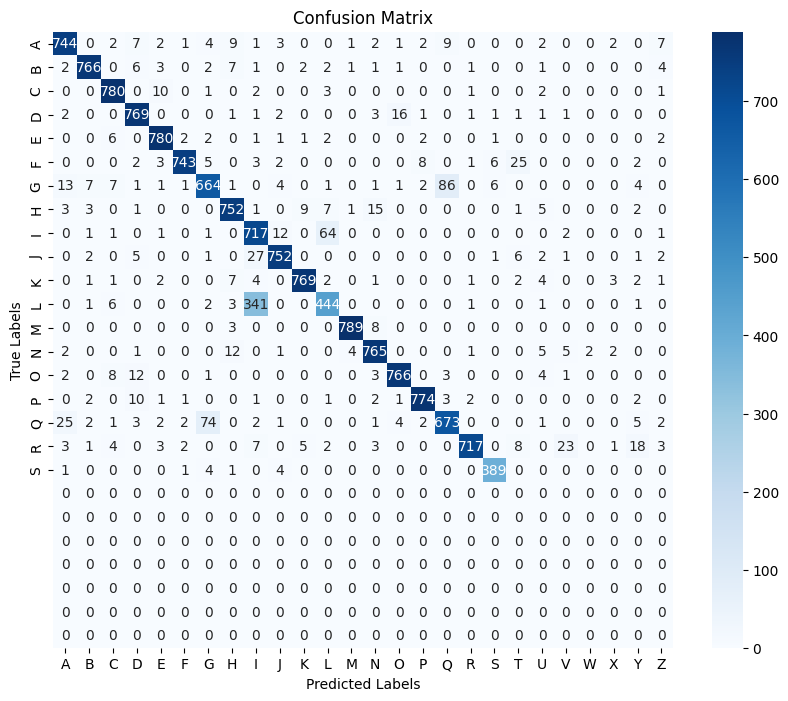

In [ ]:
# prompt: compose a confusion matrix for predicted_chars and true_chars, use sns, but make on graph xlabels above the table not below,

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming predicted_chars and true_chars are already defined from your previous code

cm = confusion_matrix(true_chars, predicted_chars)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(list(set(predicted_chars))),
            yticklabels=sorted(list(set(true_chars))))
plt.xlabel("Predicted Labels", position=(1, -0.08)) # Move xlabel above
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

In [ ]:
print(type(train_labels))
print(train_labels.dtype)

<class 'list'>


AttributeError: 'list' object has no attribute 'dtype'

In [ ]:
model.predict(test_images)


463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([5.80328408e-09, 1.44100323e-01, 2.87445640e-04, 8.53447818e-06,
       2.12905448e-04, 7.08071730e-06, 1.31880997e-05, 1.01850871e-02,
       1.19760734e-05, 3.88151617e-03, 3.95600982e-02, 8.58923727e-07,
       1.46561419e-04, 7.93771804e-09, 1.02834965e-05, 1.24842418e-05,
       1.04227311e-05, 1.59059593e-03, 4.58554041e-06, 7.84042495e-05,
       3.81872633e-06, 9.59553563e-06, 1.31223669e-06, 1.11857652e-07,
       2.54629384e-04, 3.66517366e-03, 7.95943022e-01], dtype=float32)

In [ ]:
len(pr[0])

27

In [ ]:
predicted_labels = np.argmax(model.predict(test_images), axis=1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# print distinct predicted_labels
print(np.unique(test_labels))


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
